In [10]:
import numpy as np
import pandas as pd
from statsmodels.nonparametric.kde import KDEUnivariate
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../mutationalsignature/')
from file.file.vcf import read_vcf
from plot.plot.plot import plot_points

%matplotlib inline

In [23]:
VCF_FILE_PATH = '../../../../apobec/results/vcfs/qual50_dp100/TRF008540.sorted.bam.freebayes.vcf.gz.qual50_dp100.vcf.gz'
MAF_FILE_PATH = '/home/k/Downloads/gdac.broadinstitute.org_LUAD-TP.Mutation_APOBEC.Level_4.2016012800.0.0/Mutsig_maf_modified.maf_sorted_anz2.txt'
variant_file_type = 'MAF'

In [24]:
maf = pd.read_table(MAF_FILE_PATH, comment='#', encoding = 'ISO-8859-1')

/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,17,18,19,20,21,22,23,50,67,80,81,82,83,84,88,89,91,98,99,105,111,133,146,150,163,196,229,233,334,335,337,338,339,389,390) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
if variant_file_type == 'VCF':
    vcf_dict = read_vcf(VCF_FILE_PATH)
    chromosome_groups = vcf_dict['data'].groupby('CHROM')
    
elif variant_file_type == 'MAF':
    chromosome_groups = maf.groupby('Chromosome')

2


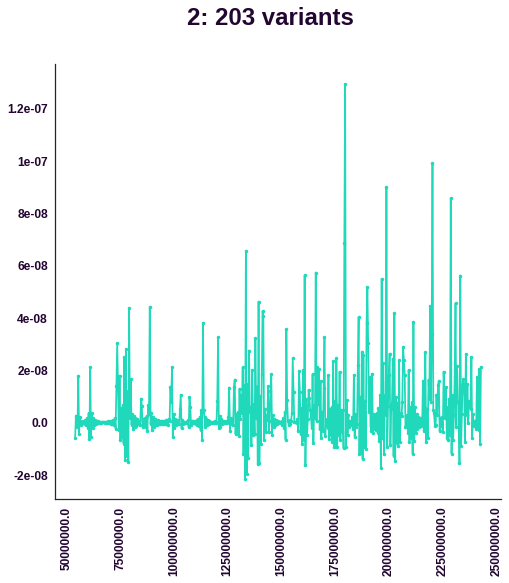

3


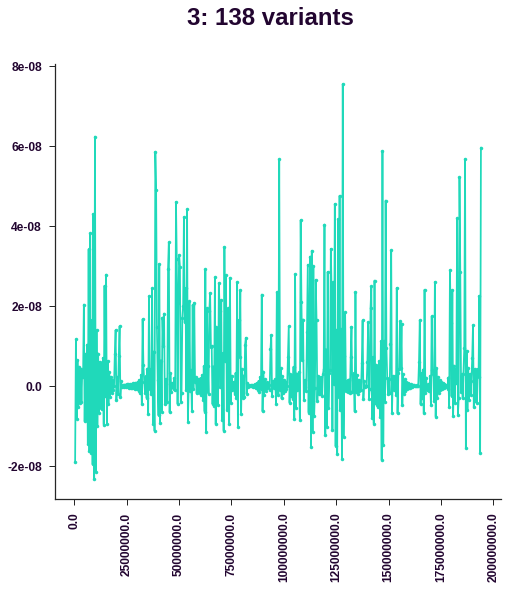

4


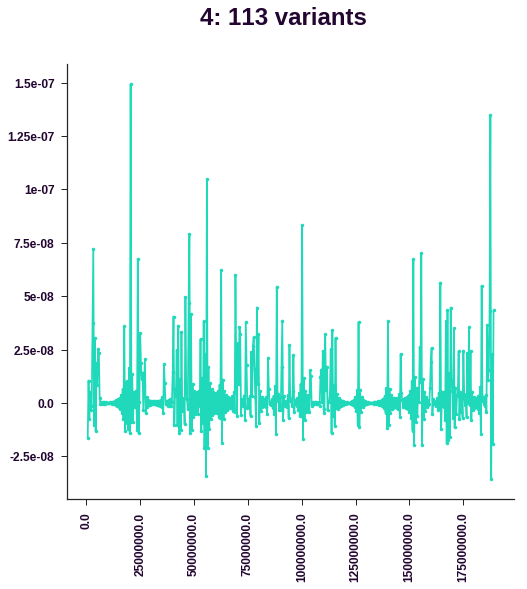

5


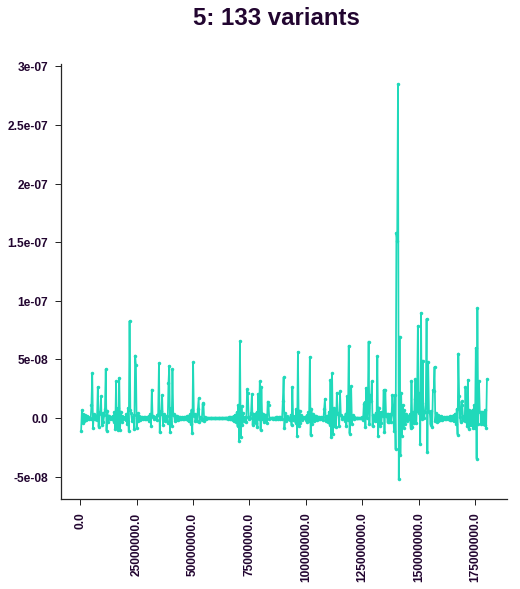

6


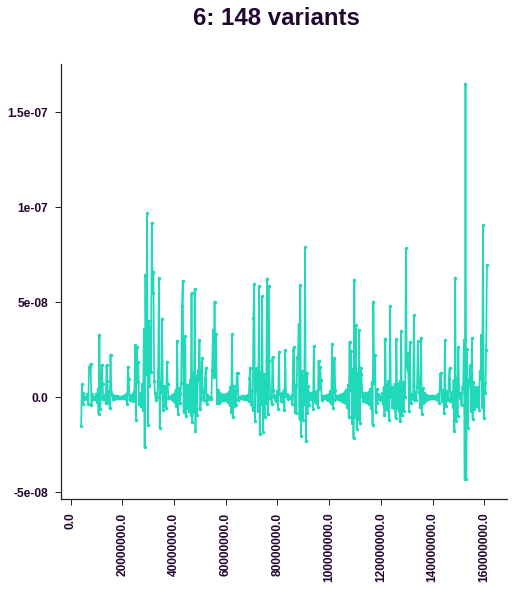

7


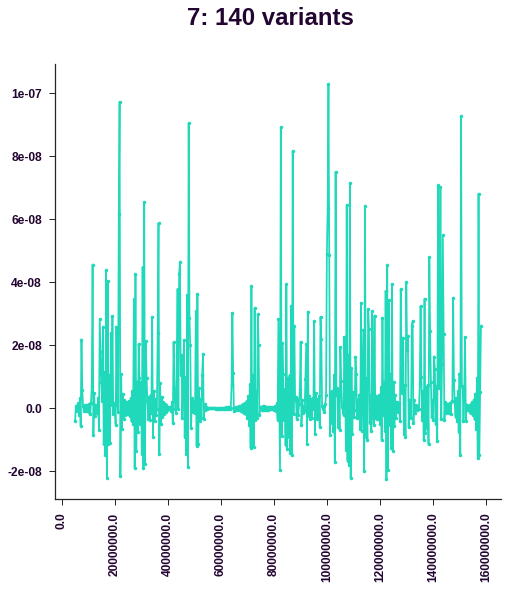

8


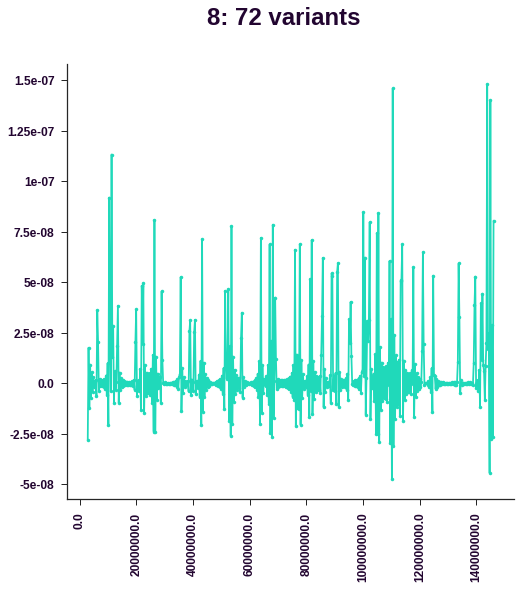

9


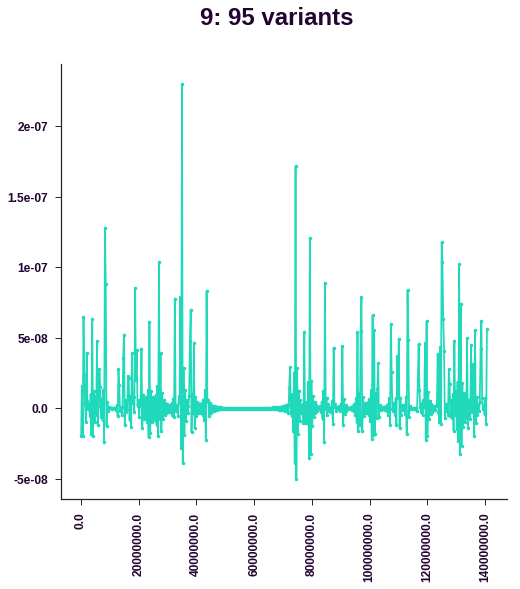

10


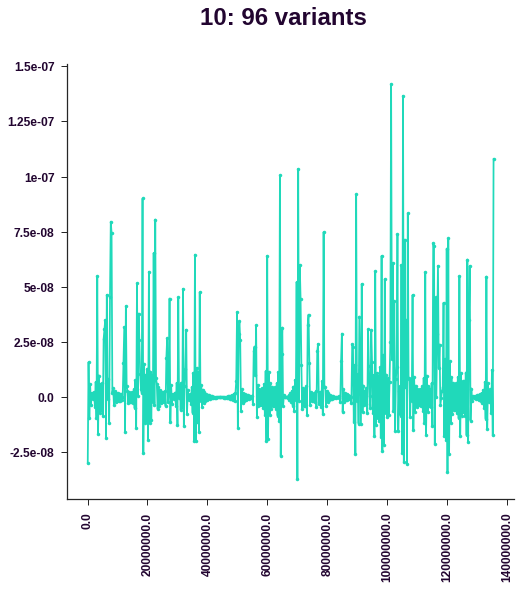

11


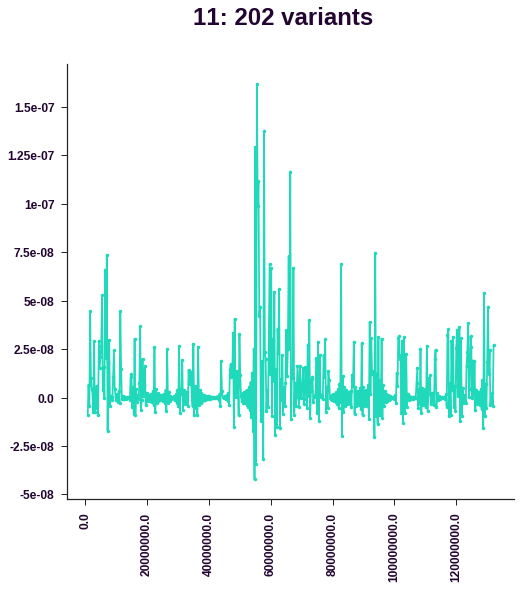

12


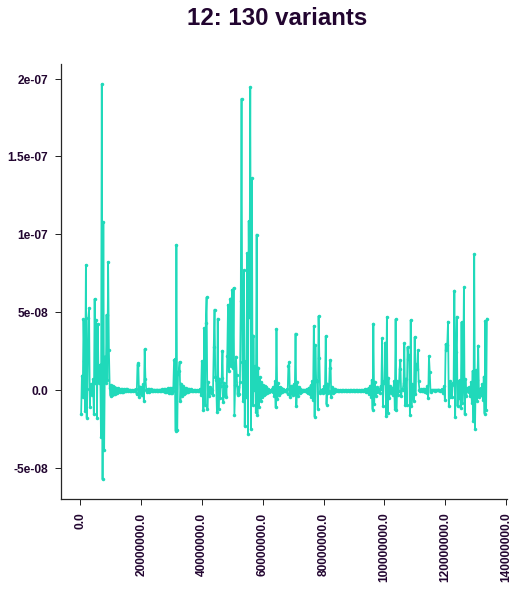

13


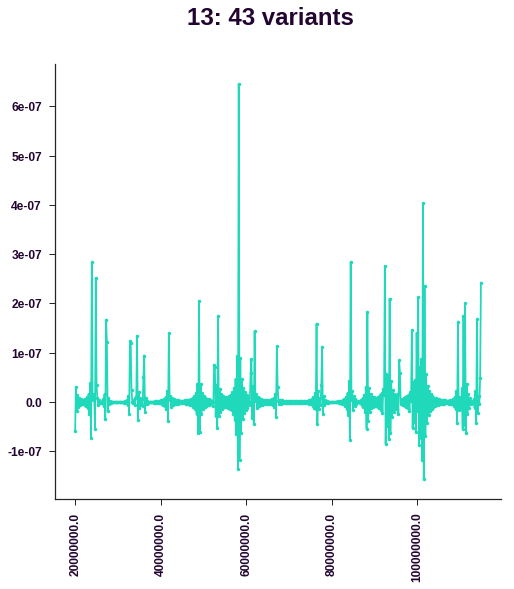

14


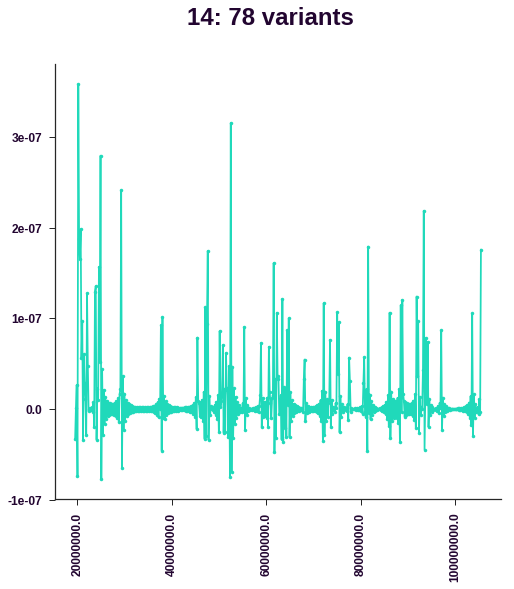

15


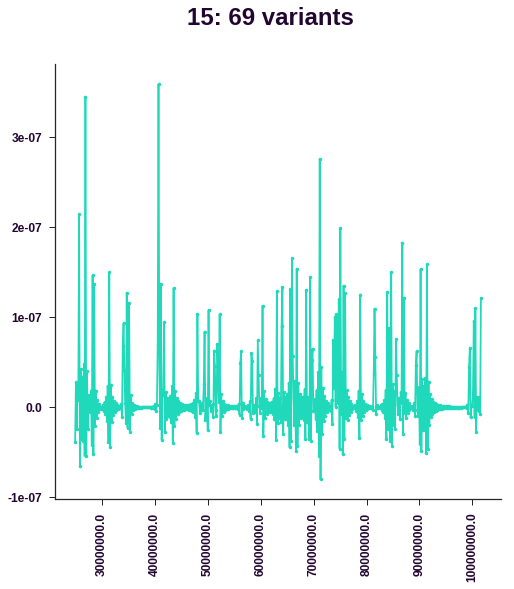

16


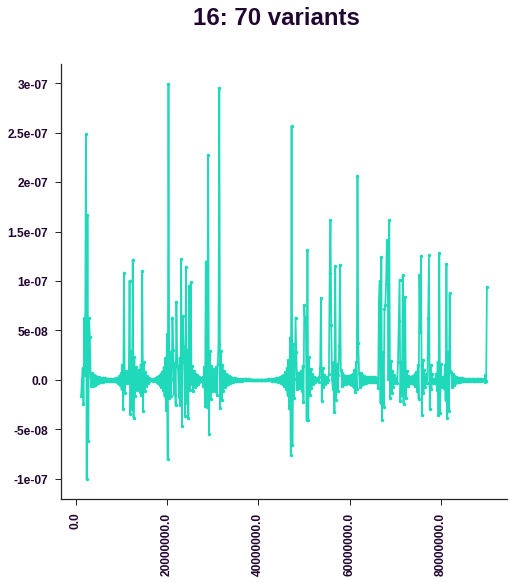

17


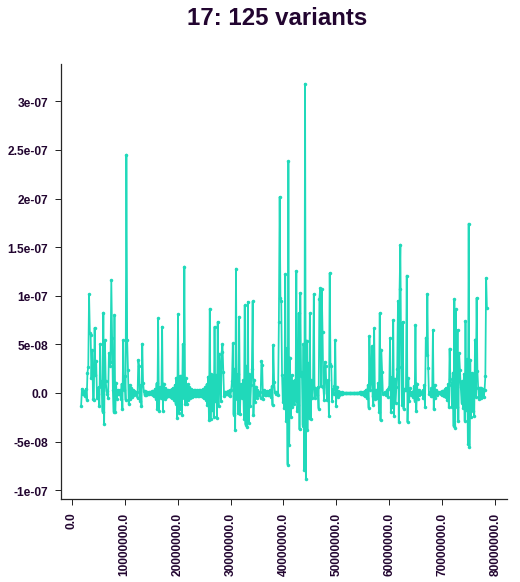

18


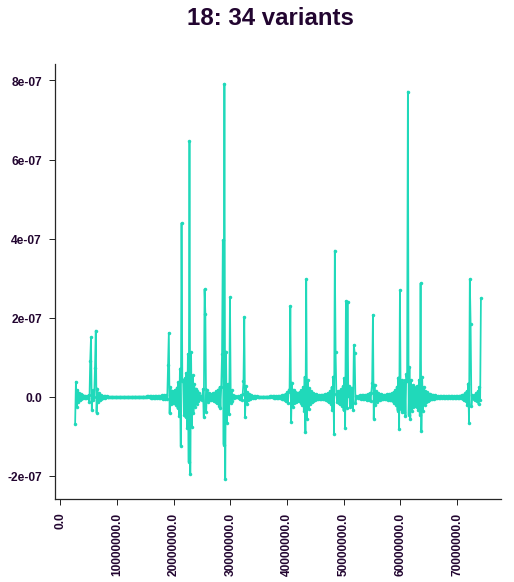

19


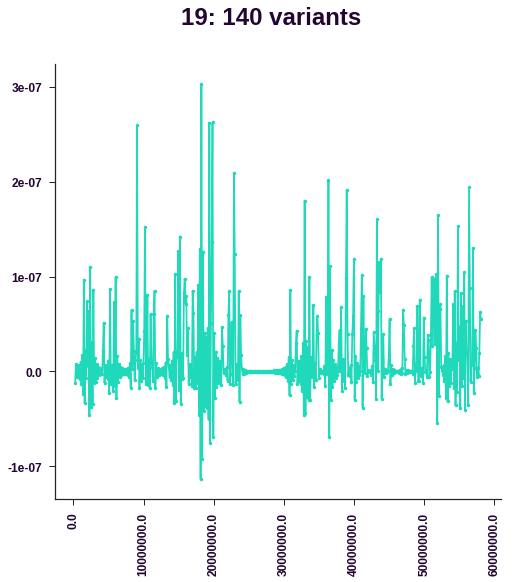

20


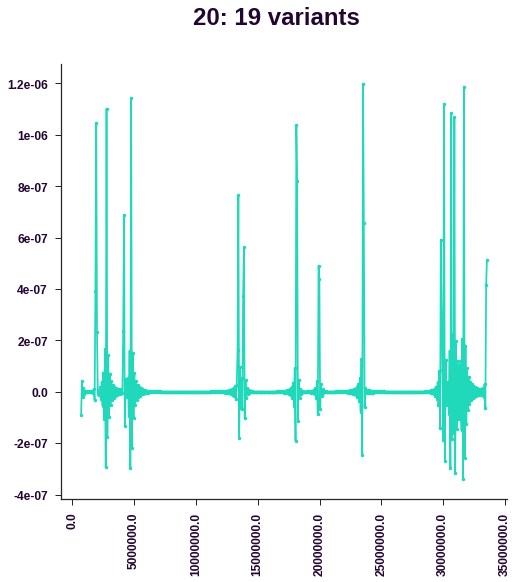

1


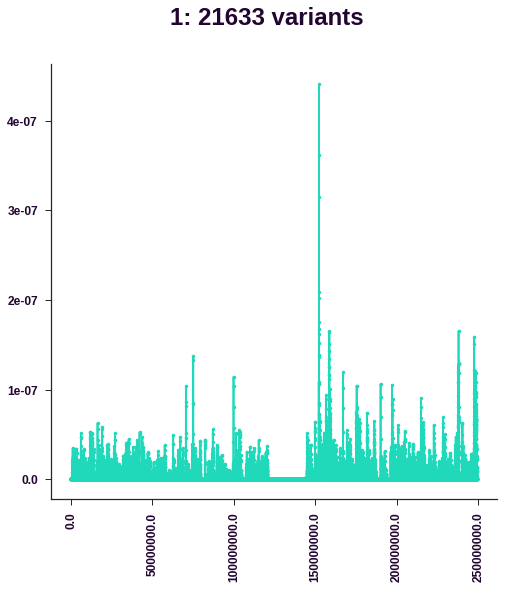

10


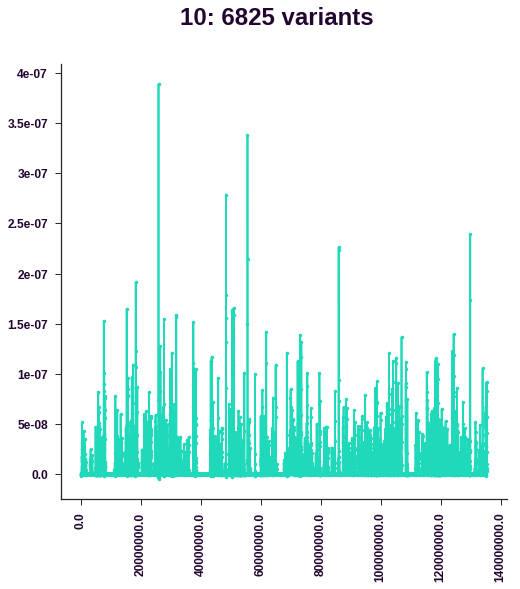

11


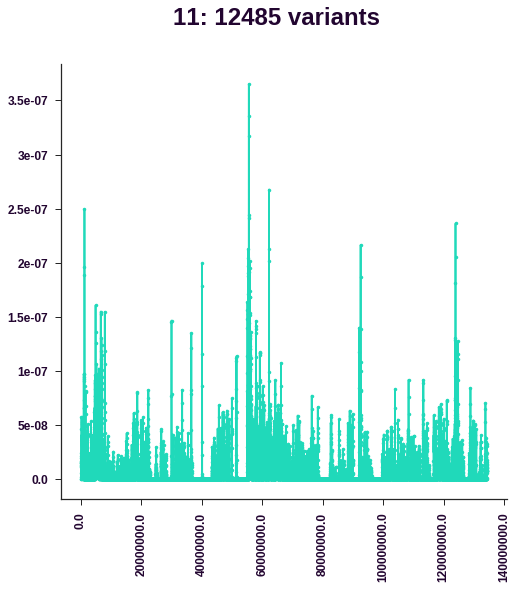

12


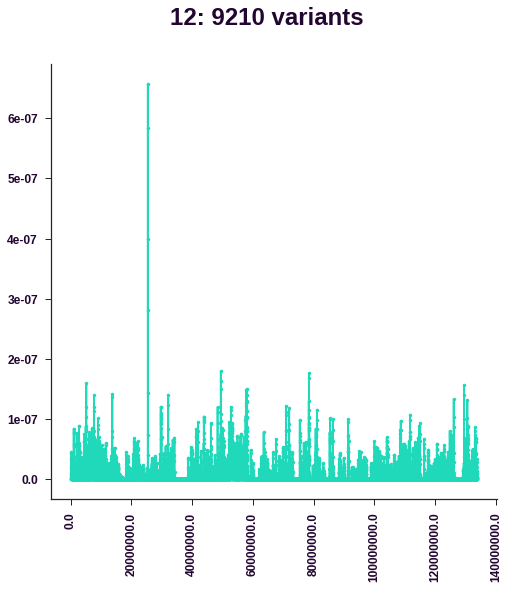

13


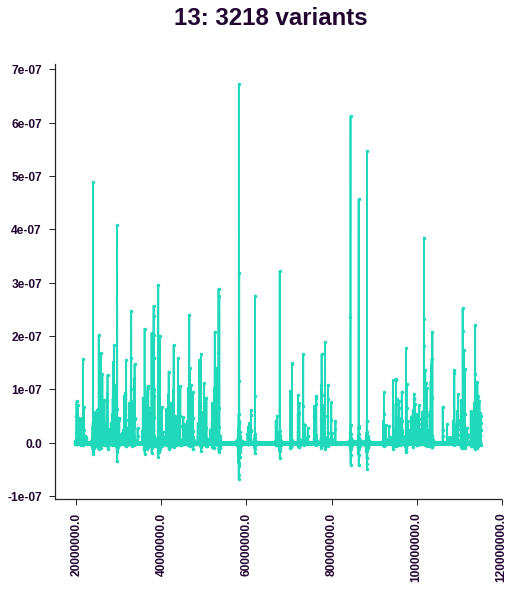

14


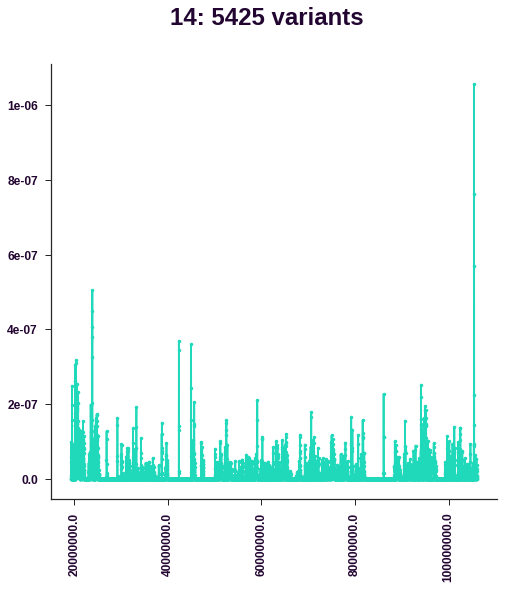

15


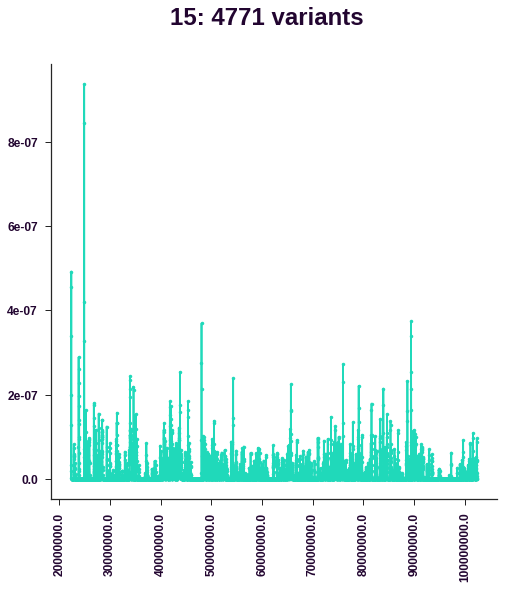

16


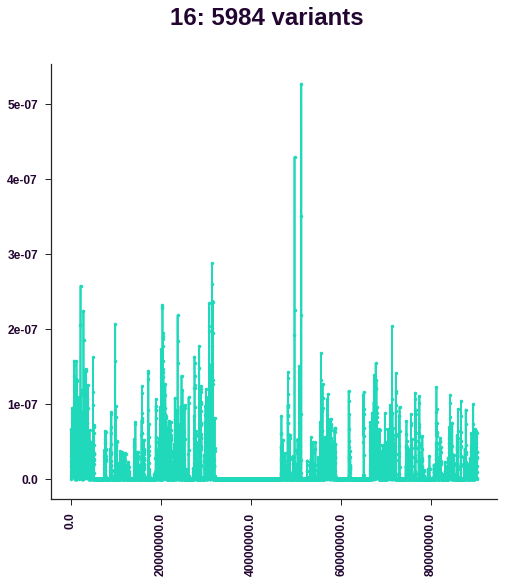

17


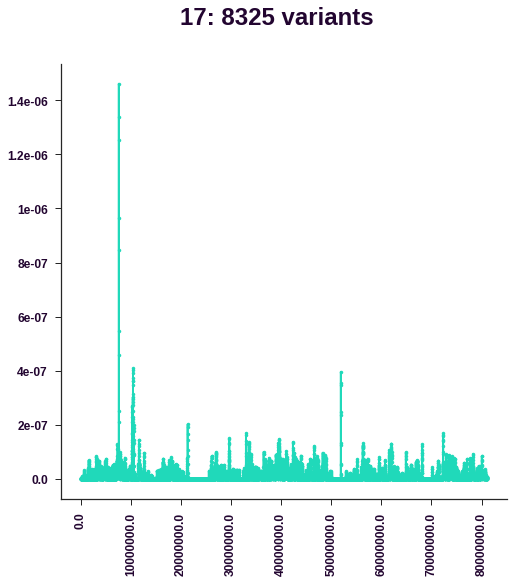

18


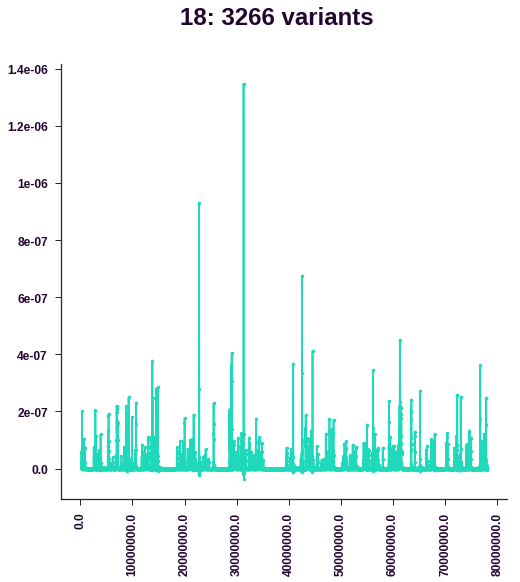

19


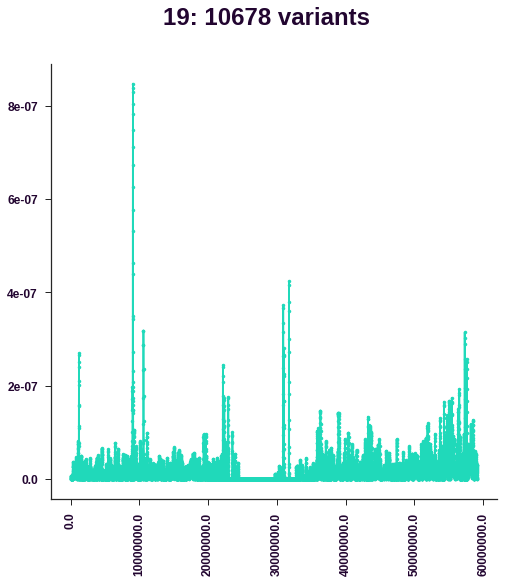

2


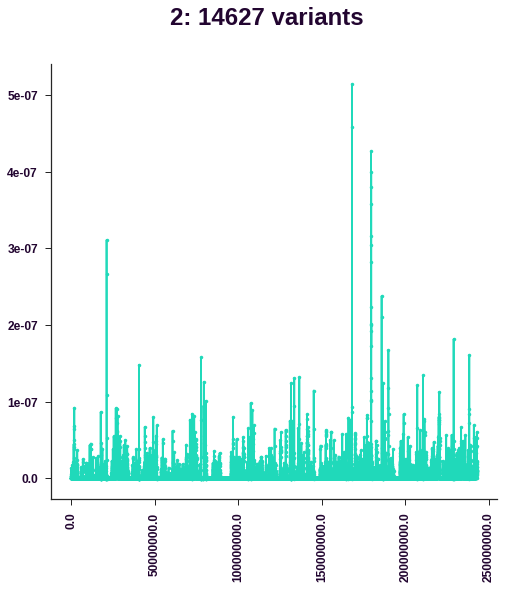

20


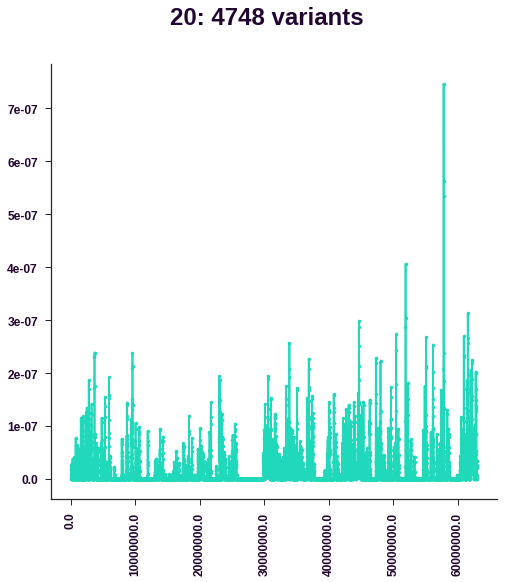

21


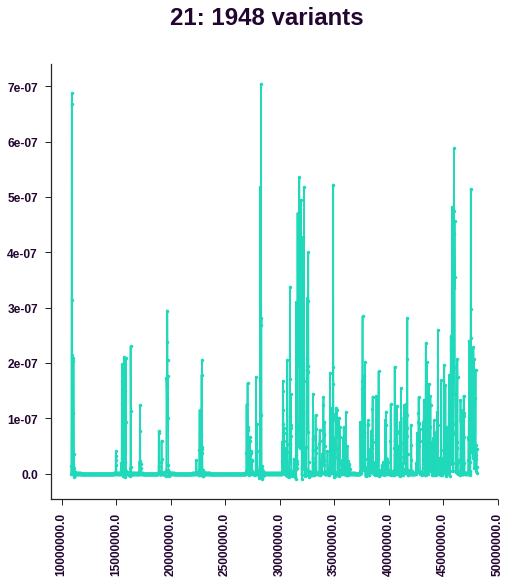

22


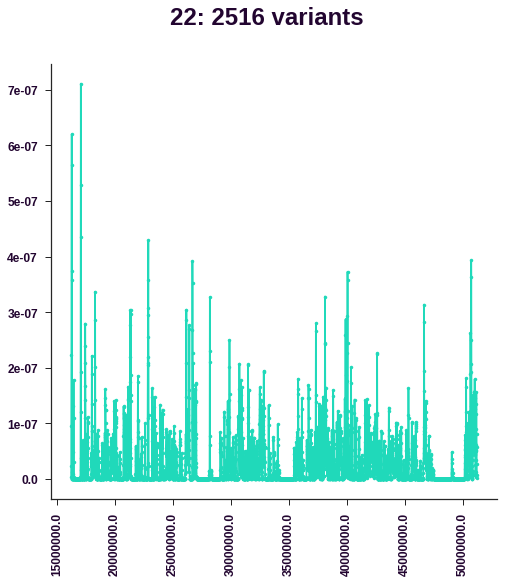

3


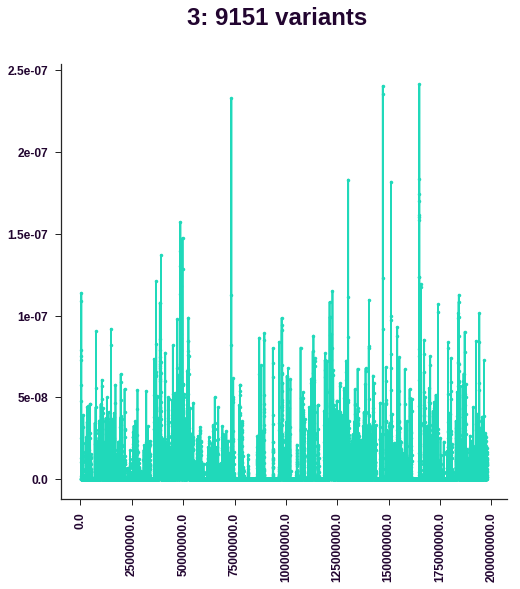

4


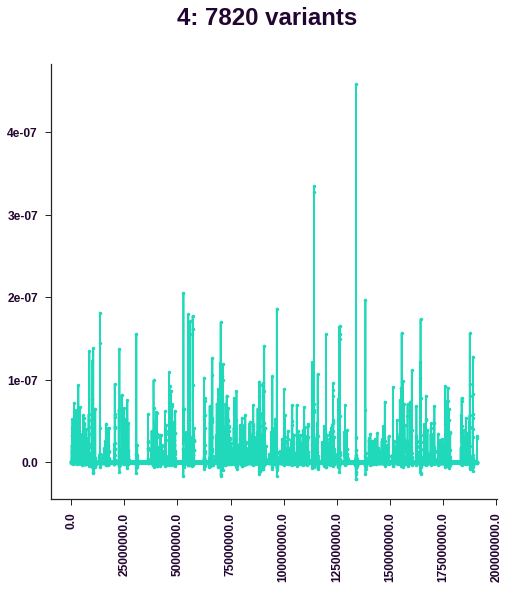

5


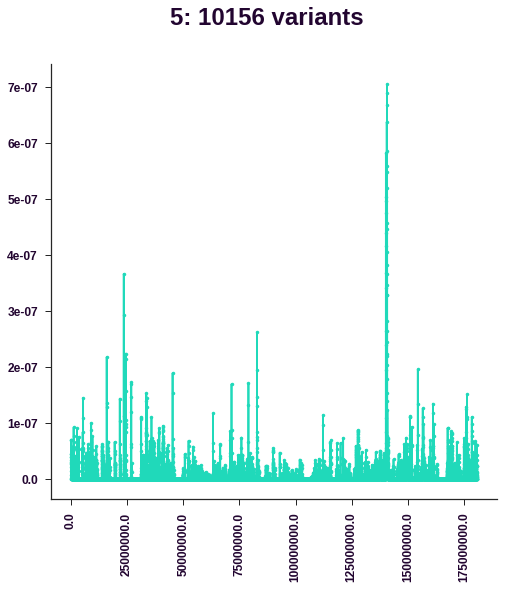

6


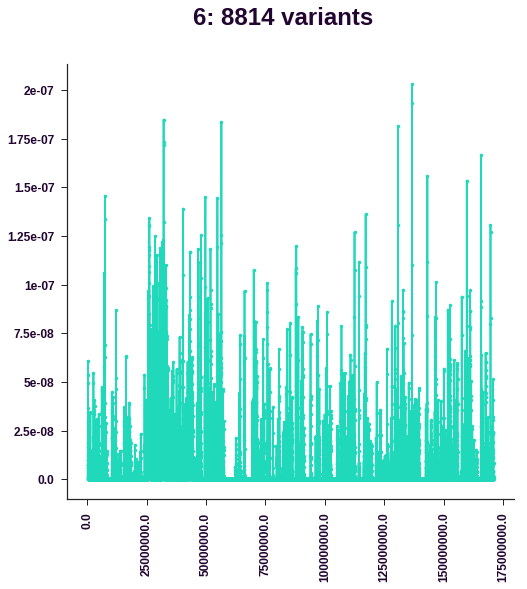

7


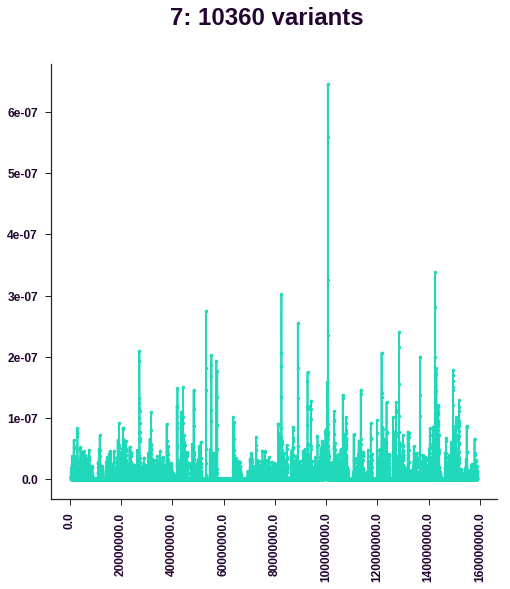

8


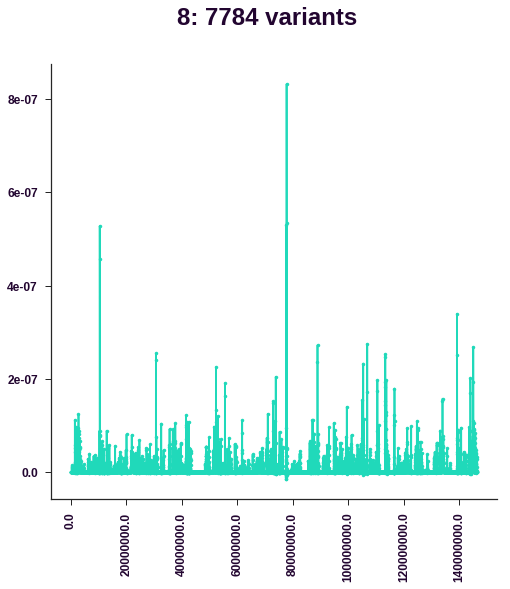

9


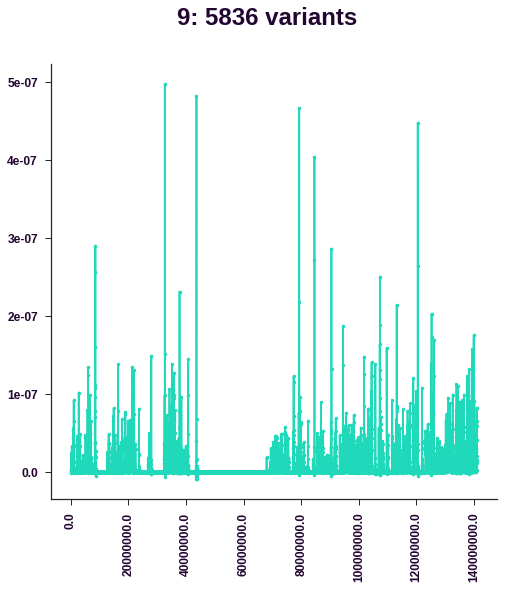

X


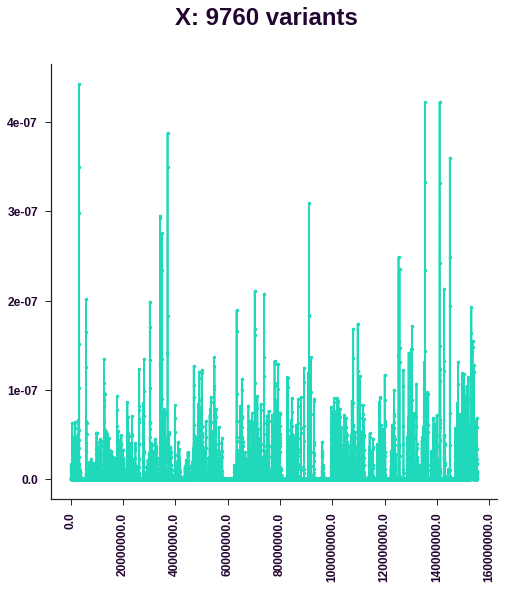

Y


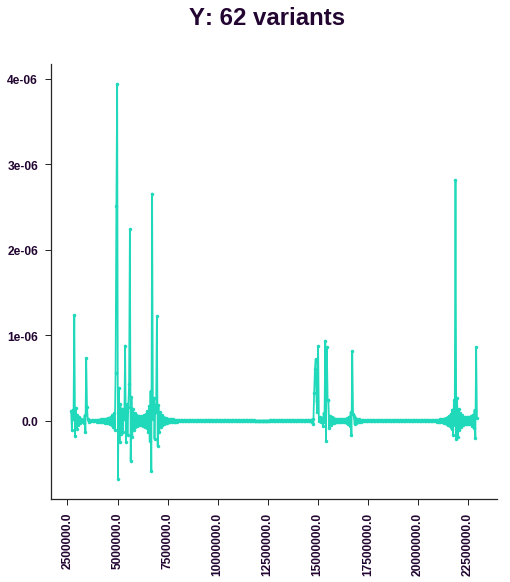

In [33]:
sns.set_style('white')
for chromosome, df in chromosome_groups:
    
    chromosome = str(chromosome)
    print(chromosome)

    if '_' in chromosome:
        continue

    if variant_file_type == 'VCF':
        x = np.array(df['POS'], dtype='float')
    elif variant_file_type == 'MAF':
        x = np.array(df['Start_Position'], dtype='float')

    kde = KDEUnivariate(x)
    kde.fit(bw=10000.0)

    plot_points(
        kde.support,
        kde.density,
        linestyle='-',
        title='{}: {} variant{}'.format(chromosome, x.size,
                                        ['', 's'][1 < x.size]))
    plt.show()